# DATA ANALYSIS

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [115]:
df=pd.read_csv('h.csv')

In [116]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df.drop('Id',axis=1,inplace=True)

In [108]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### data analysis state
####to analyse data to get some information

In [109]:
df.shape

(1460, 80)

# data analysais process
1-missing value
2-all the numerical variable
3-distribution of the numerical variable
4-categorical variable
5-cardinality of categorical variable
6-outlier
7-relationship b/w independent and dependent feature(sale price)

# missing value

In [110]:
#step 1 find no data have null value 
df.isnull().sum().to_dict()

{'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 

In [79]:
#since there are many missing value we have to find relation between dependet feature (sale price)

In [80]:
import seaborn as sns

In [81]:
df.shape

(1460, 80)

In [82]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

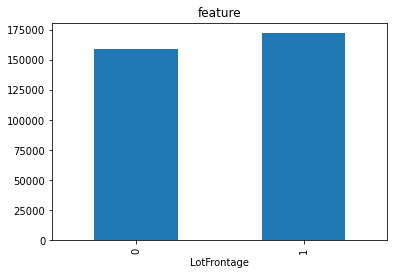

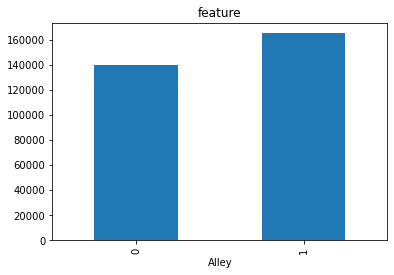

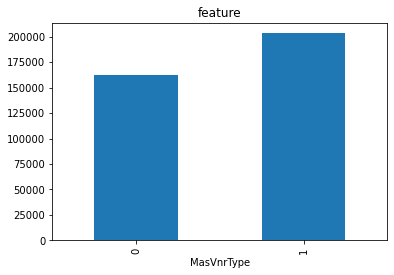

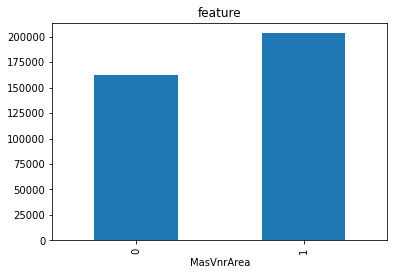

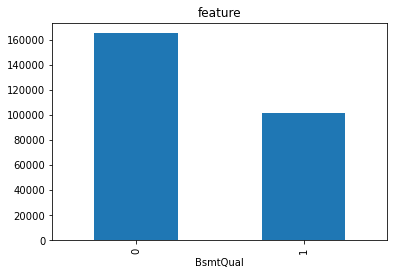

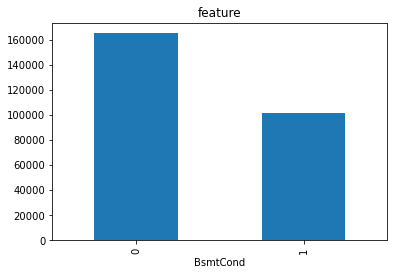

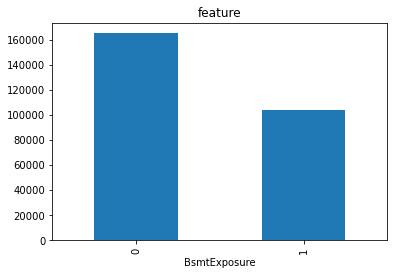

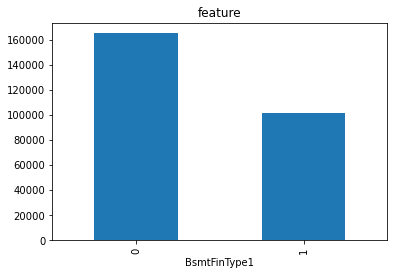

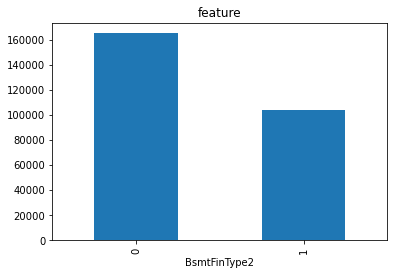

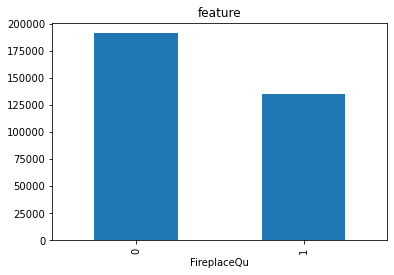

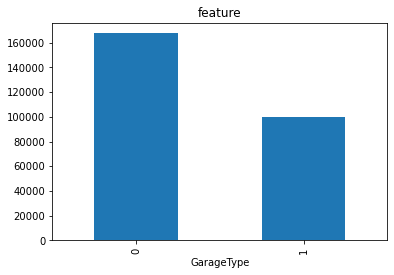

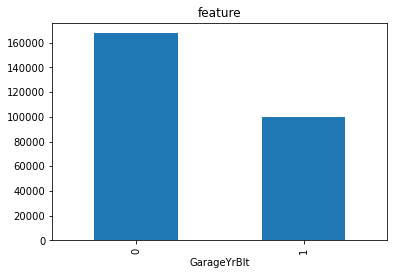

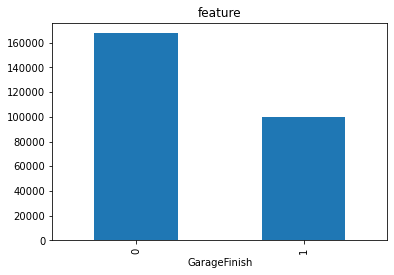

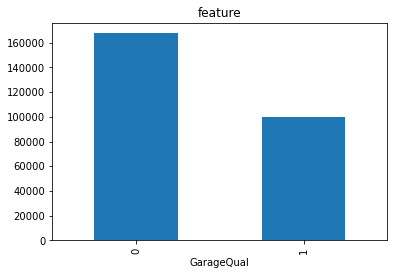

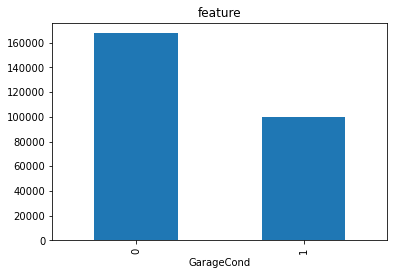

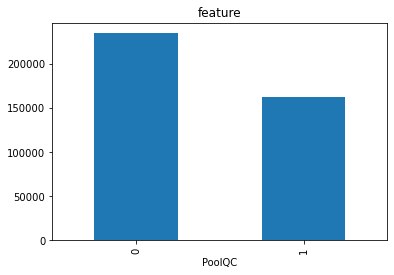

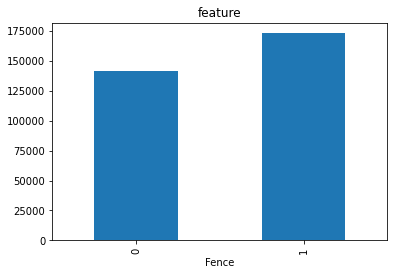

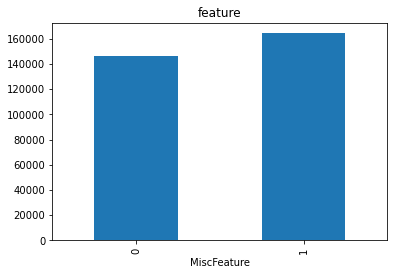

In [83]:
for feature in features_with_na:
    data=df.copy()
    #let make variable 1 is data is missing otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    #let calculate the mean saleprice where the imformation is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title('feature')
    plt.show()

Here we see there is the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

# numerical feature

In [84]:
#list of numerical variable
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']

In [85]:
print('no of numerical feature',len(numerical_feature))

no of numerical feature 37


In [86]:
df[numerical_feature].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## temporal variabel(eg:-datetime variable)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.


In [87]:
year_feature=[feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]

In [88]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

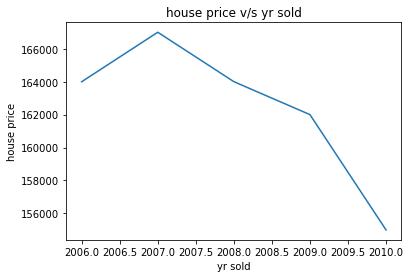

In [89]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('house price v/s yr sold')
plt.xlabel('yr sold')
plt.ylabel('house price')
plt.show()

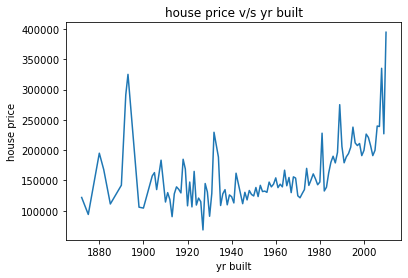

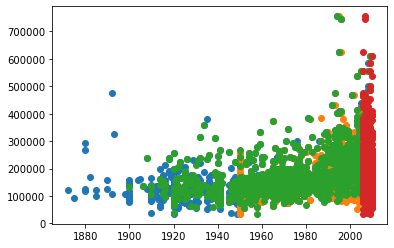

In [90]:
## Here we will compare the difference between All years feature with SalePrice
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.title('house price v/s yr built')
plt.xlabel('yr built')
plt.ylabel('house price')
plt.show()
plt.scatter(df['YearBuilt'],df['SalePrice'])
plt.scatter(df['YearRemodAdd'],df['SalePrice'])
plt.scatter(df['GarageYrBlt'],df['SalePrice'])
plt.scatter(df['YrSold'],df['SalePrice'])

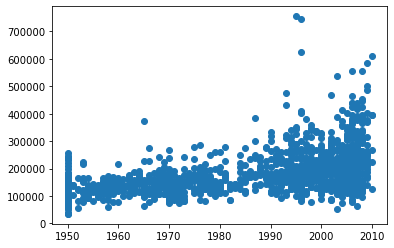

In [91]:
plt.scatter(df['YearRemodAdd'],df['SalePrice'])

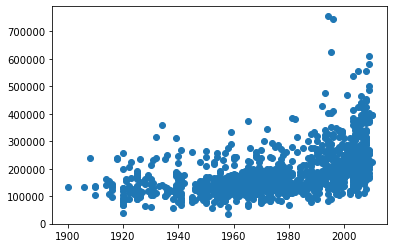

In [92]:
plt.scatter(df['GarageYrBlt'],df['SalePrice'])

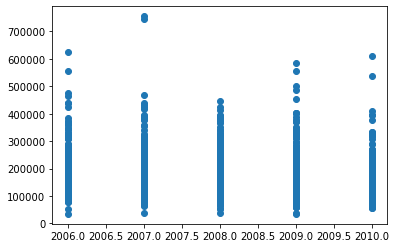

In [93]:
plt.scatter(df['YrSold'],df['SalePrice'])

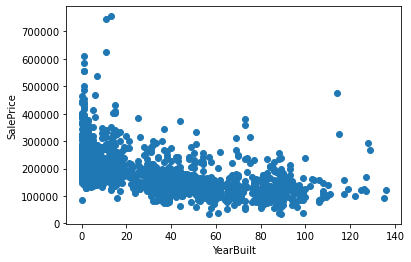

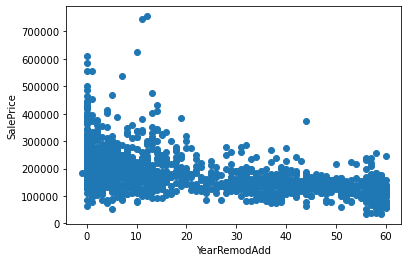

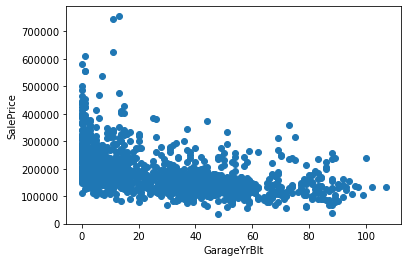

In [94]:
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [95]:
discreat_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25 and feature not in year_feature]
print('Discrete Variable Count:{}'.format(len(discreat_feature)))

Discrete Variable Count:17


In [96]:
discreat_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [97]:
df[discreat_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


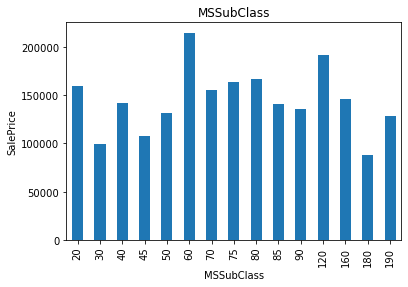

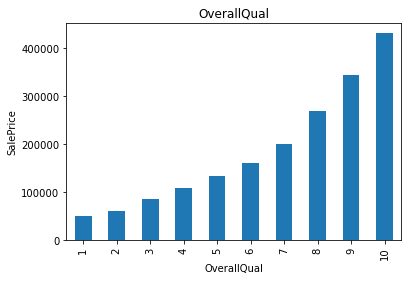

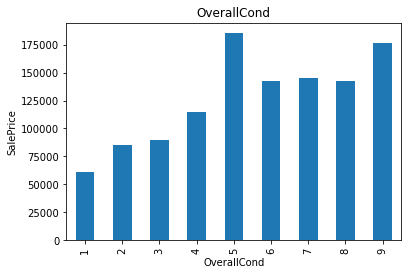

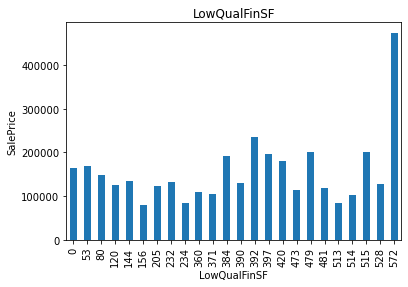

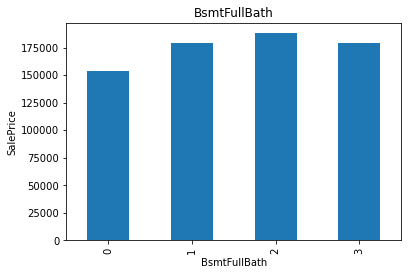

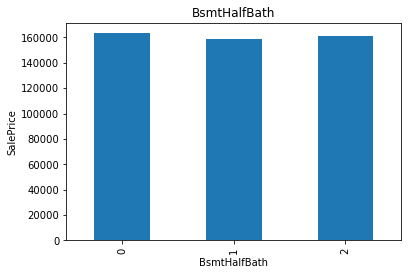

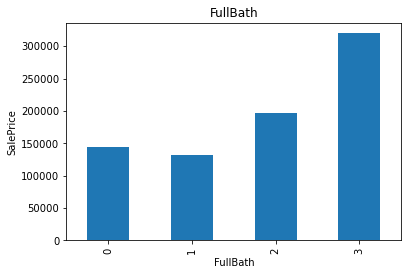

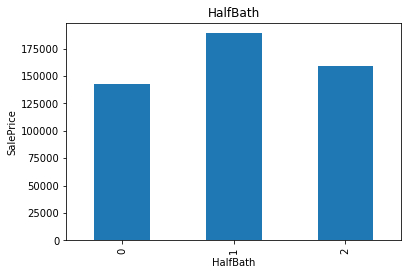

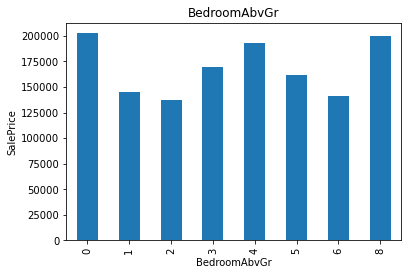

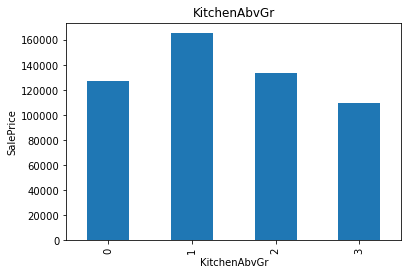

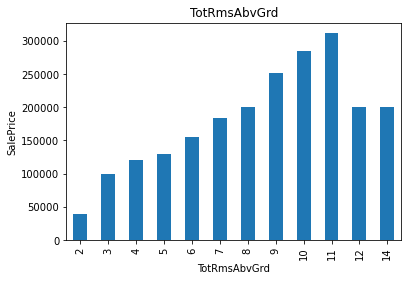

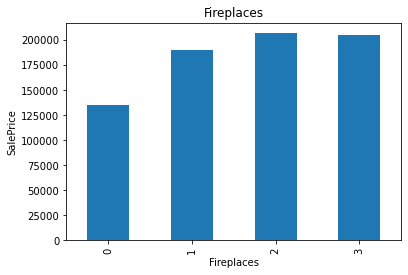

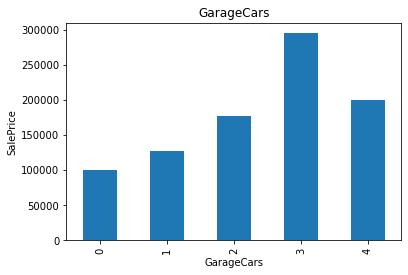

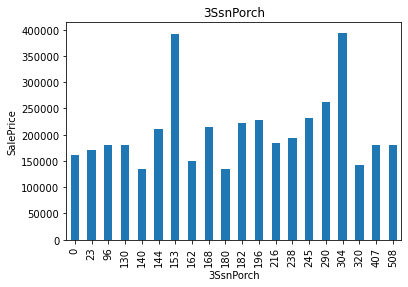

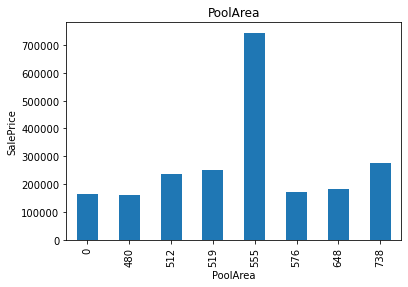

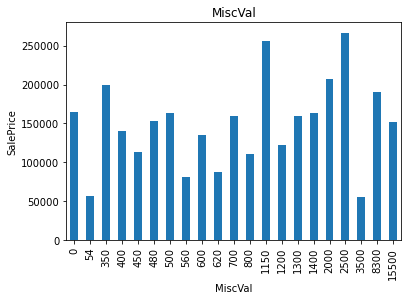

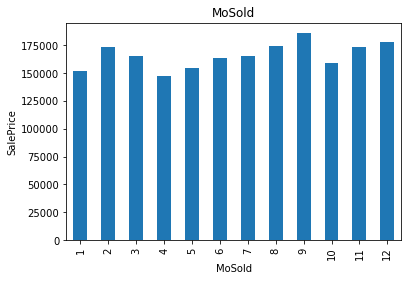

In [98]:
## Lets Find the realtionship between discreat variable and Sale PRice

for feature in discreat_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [99]:
## There is a relationship between variable number and SalePrice

In [100]:
continous_feature=[feature for feature in numerical_feature if feature not in  discreat_feature+year_feature]

In [101]:
len(continous_feature)

16

In [102]:
len(numerical_feature)

37

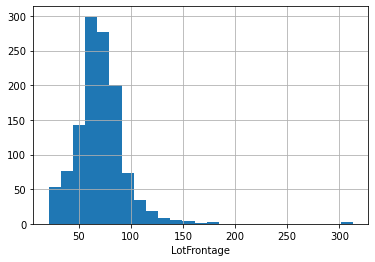

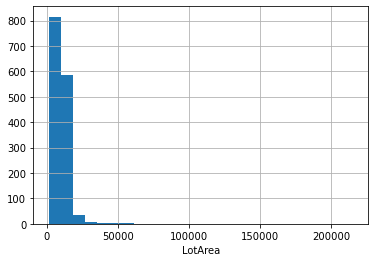

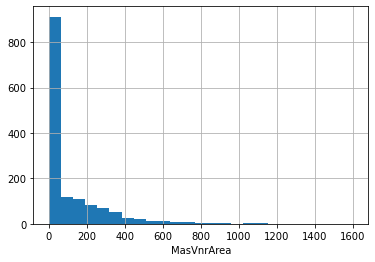

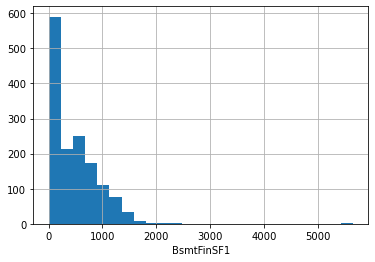

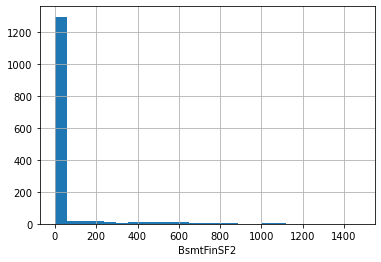

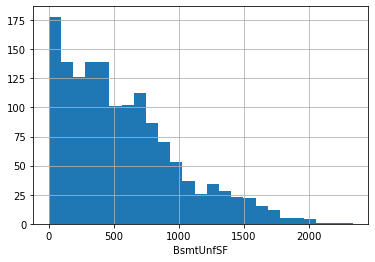

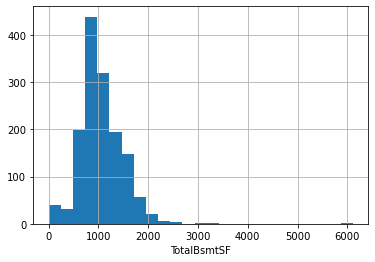

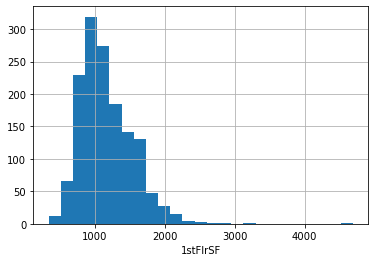

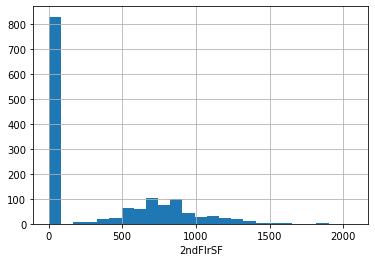

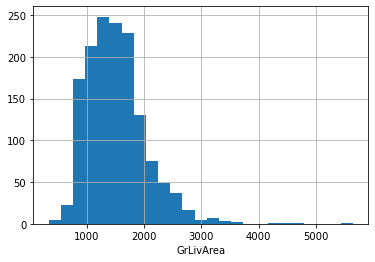

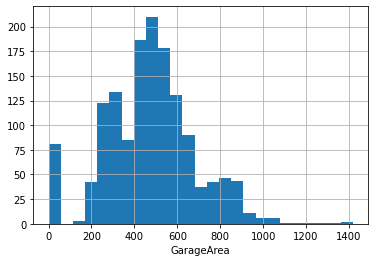

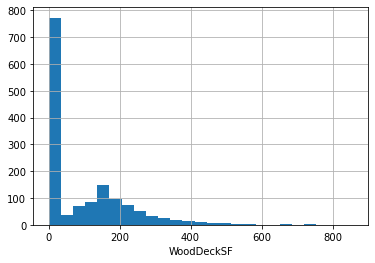

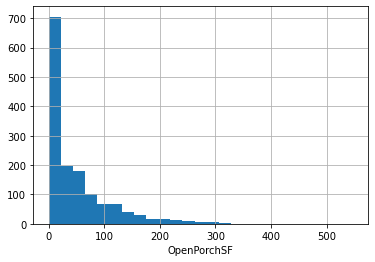

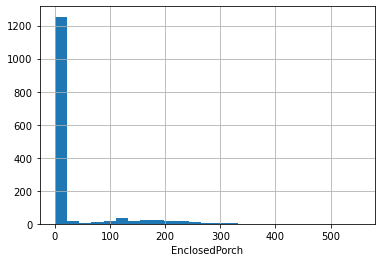

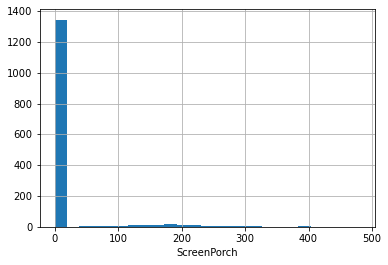

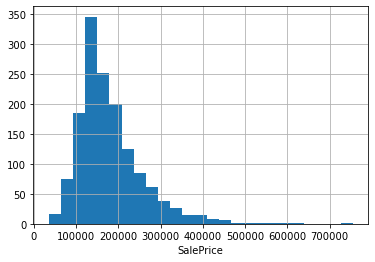

In [103]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()